<div style="text-align:center; margin-top: 1cm;">
    <h2>Київський політехнічний інститут імені Ігоря Сікорського</h2>
    <h2>Приладобудівний факультет</h2>
    <h3>Кафедра автоматизації та систем неруйнівного контролю</h3>
    <br><br><br>
</div>

<div style="text-align:center; margin-top: 5cm;">
    <h2>Практична робота №2 </h2>
    <h2>з предмету "Комп'ютерний зір"</h2>
</div>

<div style="text-align:right; margin-top: 5cm;">
<p>Студент: Погорєлов Богдан<br>
    Група: ПК-51мп<br>
</p>
</div>
<div style="text-align:center; margin-top: 5cm;">
2025 рік  <br><br><br><br>
</div>


### **Тема:** Дослідження базових технік обробки зображень: гістограми, порогова обробка, фільтрація та детектування країв

### **Мета роботи**

Метою даної роботи було поглиблене вивчення та практичне застосування фундаментальних методів обробки зображень з використанням бібліотек **OpenCV** та **Matplotlib**. Основні завдання включали:
1.  Аналіз розподілу яскравості пікселів шляхом побудови та візуалізації гістограм для відтінків сірого та RGB каналів.
2.  Дослідження методів сегментації зображення за допомогою глобальної (фіксованої, Оцу, трикутної) та адаптивної порогової обробки.
3.  Застосування просторових фільтрів для згладжування зображення (фільтр Гауса).
4.  Реалізація та порівняння градієнтних методів детектування країв (оператори Собеля та Лапласа).

### **Опис коду**

Скрипт є комплексним дослідженням, що демонструє декілька ключових технік обробки зображень. Він складається з допоміжних функцій для візуалізації та основних блоків, що виконують конкретні операції.

#### **Структура коду:**

1.  **Допоміжні функції:**
    * `show_images`: Універсальна функція для відображення набору зображень у вигляді сітки за допомогою `matplotlib`. Вона коректно обробляє як кольорові (конвертуючи BGR в RGB), так і монохромні зображення.
    * `Threshold_Demo`: Функція, що застосовує до зображення декілька методів бінаризації: три з фіксованим порогом та два автоматичних (Оцу та трикутний).
    * `plot_histograms`: Функція для розрахунку та побудови гістограм яскравості для монохромного зображення та для кожного з R, G, B каналів кольорового.

2.  **Основний потік виконання:**
    * **Завантаження:** Скрипт завантажує зображення `kpi.jpg` і створює його копію у відтінках сірого.
    * **Аналіз гістограм:** Будуються та відображаються гістограми, що показують розподіл інтенсивності пікселів.
    * **Порогова обробка:** Демонструється робота різних алгоритмів бінаризації, як глобальних, так і адаптивних (`ADAPTIVE_THRESH_MEAN_C`, `ADAPTIVE_THRESH_GAUSSIAN_C`).
    * **Фільтрація та виділення країв:** Послідовно застосовуються такі операції:
        * Зміна колірного простору на HSV.
        * Розмиття за Гаусом з різними параметрами для зменшення шуму.
        * Застосування операторів Лапласа та Собеля для виявлення країв (контурів об'єктів).
        * Обчислення та візуалізація величини градієнта для отримання більш чіткої карти країв.

### **Результат виконання**

У результаті роботи скрипта було отримано серію візуалізацій, що демонструють ефекти від застосування кожної з технік.

1.  **Гістограми:** Побудовані графіки чітко показали розподіл яскравості пікселів для кожного каналу, що є корисним для подальшого аналізу та вибору порогів.
    

2.  **Порогова обробка:** Було продемонстровано, що прості методи бінаризації ефективні для контрастних зображень, тоді як адаптивні методи дають значно кращий результат на зображеннях з нерівномірним освітленням.
    

3.  **Фільтрація та виділення країв:** Візуальні результати показали, як розмиття за Гаусом прибирає дрібні деталі та шум. Оператори Собеля ефективно виділили вертикальні та горизонтальні краї, а оператор Лапласа — області швидкої зміни інтенсивності. Обчислення величини градієнта дозволило об'єднати інформацію про краї з обох напрямків в єдине зображення.

### **Висновок**

Під час виконання цієї лабораторної роботи я поглибив свої знання та практичні навички у сфері комп'ютерного зору. Я детально розібрався в наступних аспектах:

* **Гістограми** є потужним інструментом для аналізу зображень, що дозволяє оцінити контрастність та розподіл яскравості.
* **Методи бінаризації** є ключовим етапом для багатьох задач сегментації, причому вибір між **глобальним** та **адаптивним** порогом залежить від умов освітлення на зображенні.
* **Просторова фільтрація**, зокрема **фільтр Гауса**, є невід'ємною частиною попередньої обробки для усунення шумів.
* **Градієнтні оператори (Собеля, Лапласа)** є основою для алгоритмів детектування країв, які, своєю чергою, використовуються для виділення контурів об'єктів.

Я отримав цінний досвід роботи з функціоналом бібліотек **OpenCV** та **Matplotlib**, що дозволило мені реалізувати та візуалізувати цілий конвеєр обробки зображення.

In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def show_images(images, titles, cols=3):
    rows = (len(images) + cols - 1) // cols
    plt.figure(figsize=(15, 5 * rows))
    for i, (img, title) in enumerate(zip(images, titles)):
        plt.subplot(rows, cols, i+1)
        if len(img.shape) == 2:  # grayscale
            plt.imshow(img, cmap="gray")
        else:  # BGR -> RGB
            plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
        plt.title(title)
        plt.axis("off")
    plt.tight_layout()
    plt.show()


def Threshold_Demo(gray_img):
    Limages = []
    Lnames = []

    m1 = int(gray_img.min())
    m2 = int(gray_img.max())

    thresholds = [
        ("Binary threshold MIN+(MAX-MIN)//4", m1 + (m2-m1)//4, None),
        ("Binary threshold MIN+(MAX-MIN)//2", m1 + (m2-m1)//2, None),
        ("Binary threshold MIN+3*(MAX-MIN)//4", m1 + 3*(m2-m1)//4, None),
        ("OTSU threshold [0..255]", 0, cv.THRESH_OTSU),
        ("Triangle threshold [0..255]", 0, cv.THRESH_TRIANGLE)
    ]

    for name, t, flag in thresholds:
        if flag is None:
            _, th = cv.threshold(gray_img, t, 255, cv.THRESH_BINARY)
            Lnames.append(f"{name} = {t}")
        else:
            _, th = cv.threshold(gray_img, t, 255, cv.THRESH_BINARY + flag)
            Lnames.append(name)
        Limages.append(th)

    return Limages, Lnames

def draw_hist(title, data, colors, labels):
    fig, ax = plt.subplots()
    for d, color, label in zip(data, colors, labels):
        ax.plot(d, color=color, label=label)
    ax.set_title(f'Histogram ({title})')
    ax.set_xlabel("Pixel value")
    ax.set_ylabel("Count")
    ax.set_xlim([0, 256])
    if len(labels) > 1:
        ax.legend()
    return fig

def plot_histograms(color_img, gray_img):
    plots = [
        {
            "title": "Grayscale",
            "data": [gray_img.ravel()],
            "colors": ["black"],
            "labels": ["Gray"]
        },
        {
            "title": "RGB channels",
            "data": [cv.calcHist([color_img], [i], None, [256], [0, 256]) for i in range(3)],
            "colors": ["b", "g", "r"],
            "labels": ["Blue", "Green", "Red"]
        }
    ]

    # повертаємо список фігур
    figs = [draw_hist(p["title"], p["data"], p["colors"], p["labels"]) for p in plots]
    return figs


In [3]:
filename = "kpi.jpg"
col_img = cv.imread(filename)
gray = cv.cvtColor(col_img, cv.COLOR_BGR2GRAY)

C:\Users\kek\AppData\Local\Temp\ipykernel_4504\2467081433.py:3: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


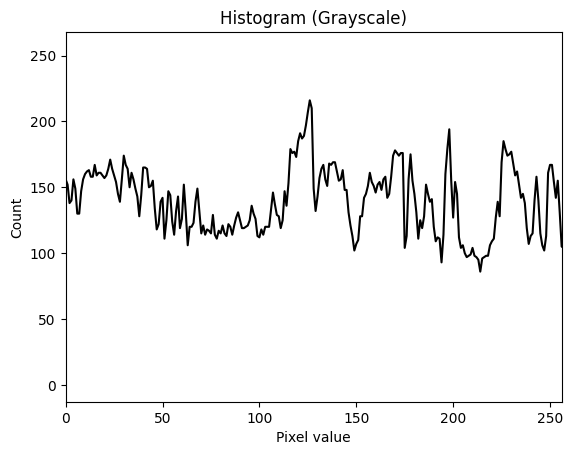

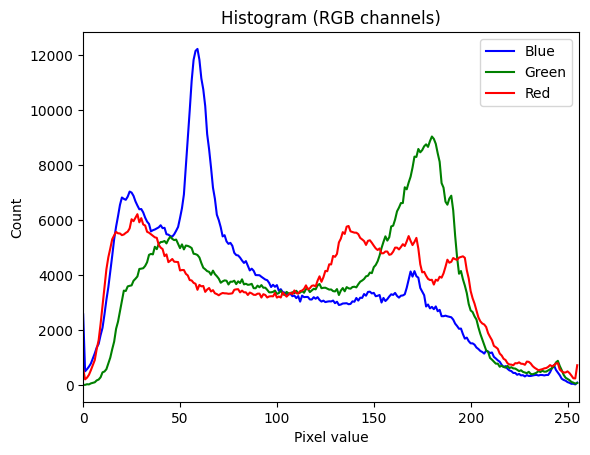

In [4]:
figs = plot_histograms(col_img, gray)
for fig in figs:
    fig.show()

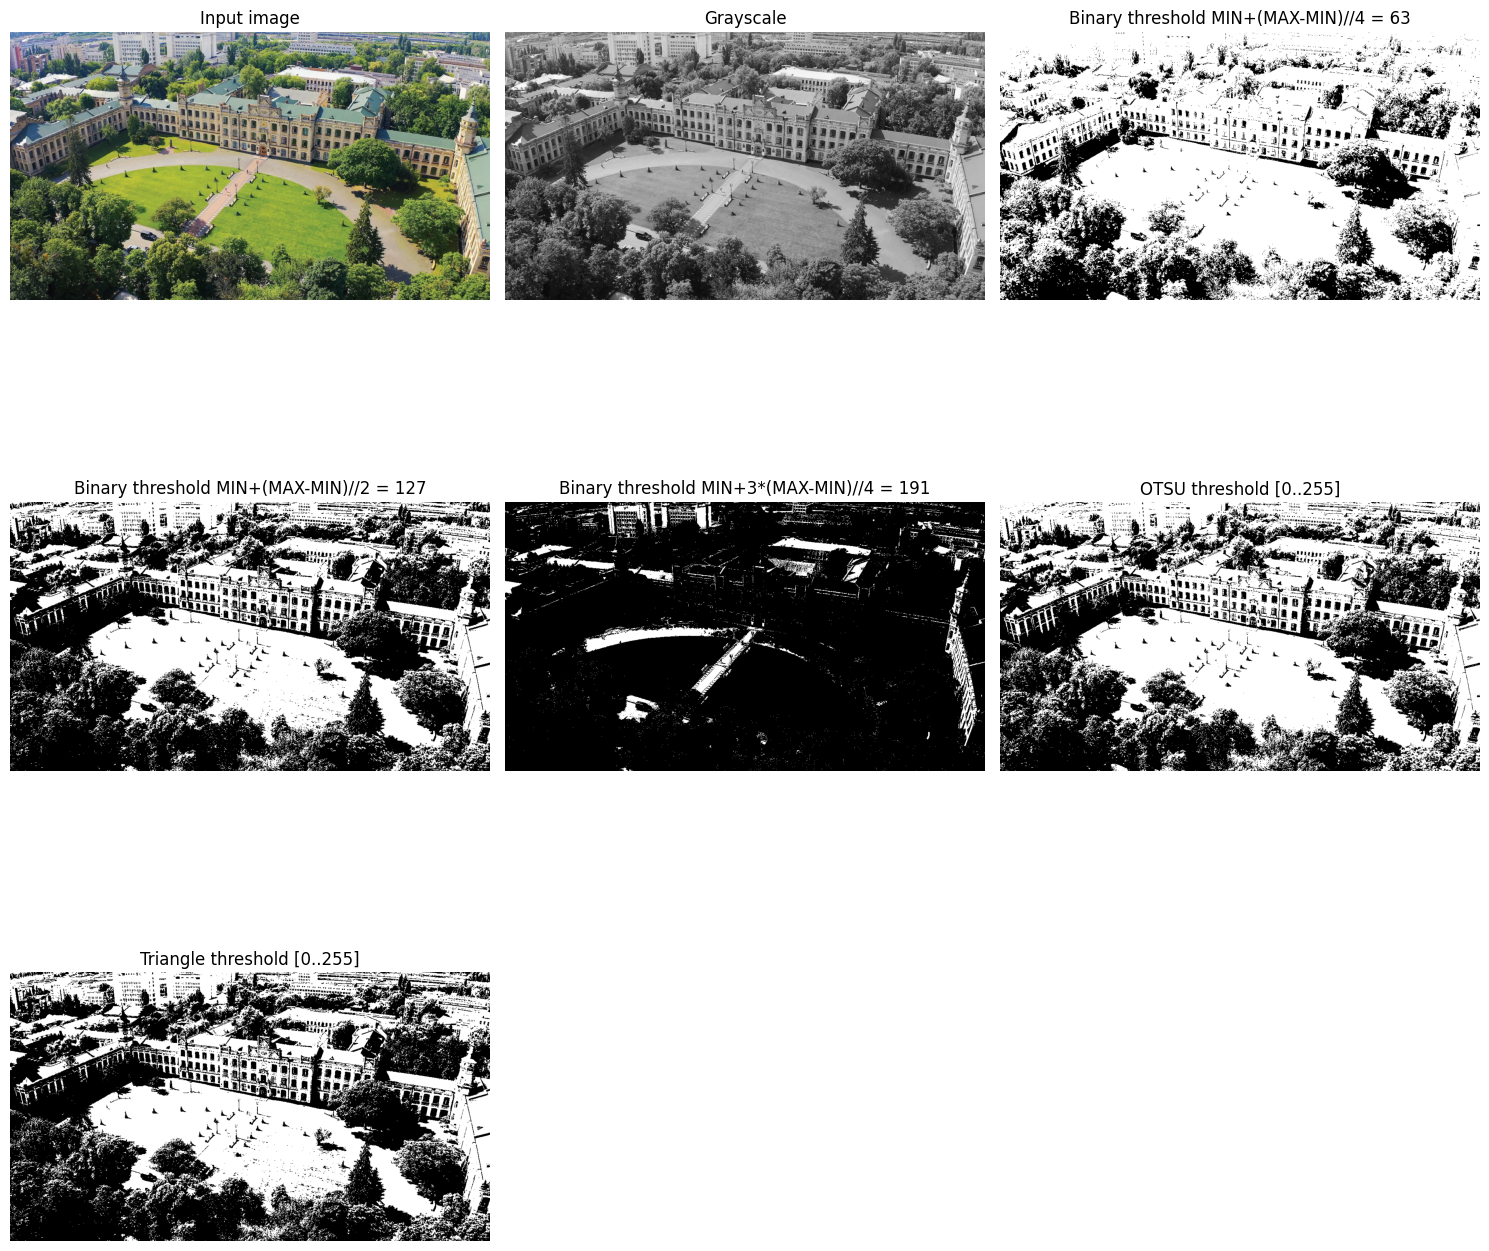

In [5]:
Limages, Lnames = Threshold_Demo(gray)
show_images([col_img, gray] + Limages, ["Input image", "Grayscale"] + Lnames, cols=3)

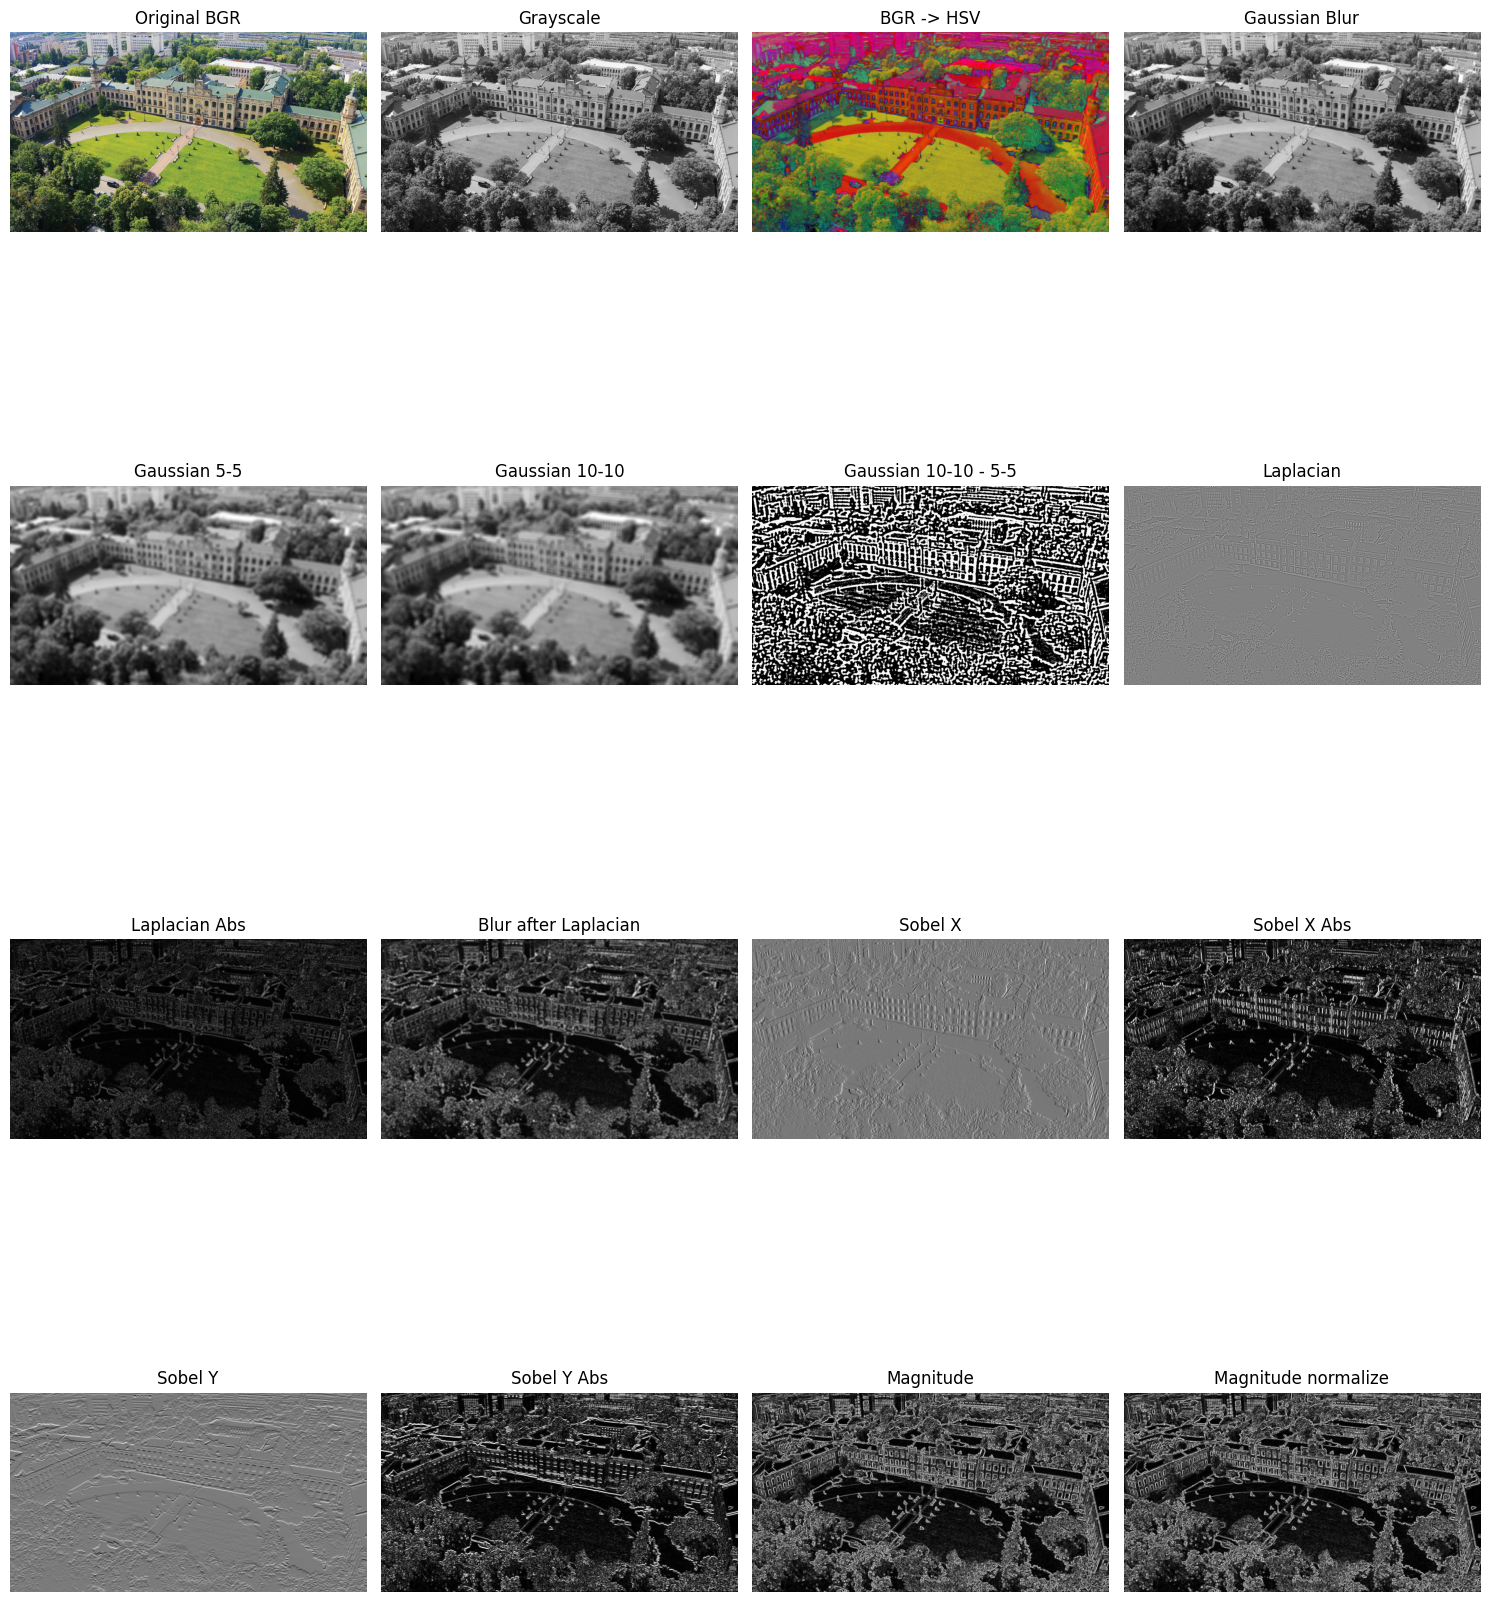

In [6]:
processed_images = {
    "Original BGR":  col_img,
    "Grayscale": gray,
    "BGR -> HSV": cv.cvtColor(col_img, cv.COLOR_BGR2HSV),
    "Gaussian Blur": cv.GaussianBlur(gray, (5, 5), 0)
}

processed_images["Gaussian 5-5"] =  cv.GaussianBlur(gray, (15, 15), sigmaX=5, sigmaY=5)
processed_images["Gaussian 10-10"] =  cv.GaussianBlur(gray, (15, 15), sigmaX=10, sigmaY=10)

processed_images["Gaussian 10-10 - 5-5"] =  processed_images["Gaussian 10-10"] - processed_images["Gaussian 5-5"]


processed_images["Laplacian"] = cv.Laplacian(processed_images["Gaussian Blur"], cv.CV_64F)
processed_images["Laplacian Abs"] = cv.convertScaleAbs(processed_images["Laplacian"])
processed_images["Blur after Laplacian"] = cv.blur(processed_images["Laplacian Abs"], (5, 5))

processed_images["Sobel X"] = cv.Sobel(processed_images["Gaussian Blur"], cv.CV_64F, dx=1, dy=0, ksize=3)
processed_images["Sobel X Abs"] = cv.convertScaleAbs(processed_images["Sobel X"])

processed_images["Sobel Y"] = cv.Sobel(processed_images["Gaussian Blur"], cv.CV_64F, dx=0, dy=1, ksize=3)
processed_images["Sobel Y Abs"] = cv.convertScaleAbs(processed_images["Sobel Y"])

sobel_x = processed_images["Sobel X"].astype(np.float32)
sobel_y = processed_images["Sobel Y"].astype(np.float32)


magnitude = cv.magnitude(sobel_x, sobel_y)
magnitude = np.uint8(magnitude)
processed_images["Magnitude"] = magnitude

magnitude_normalize = cv.normalize(magnitude, None, 0, 255, cv.NORM_MINMAX)
magnitude_normalize = np.uint8(magnitude_normalize)
processed_images["Magnitude normalize"] = magnitude_normalize


show_images(
    list(processed_images.values()),
    list(processed_images.keys()),
    cols=4
)

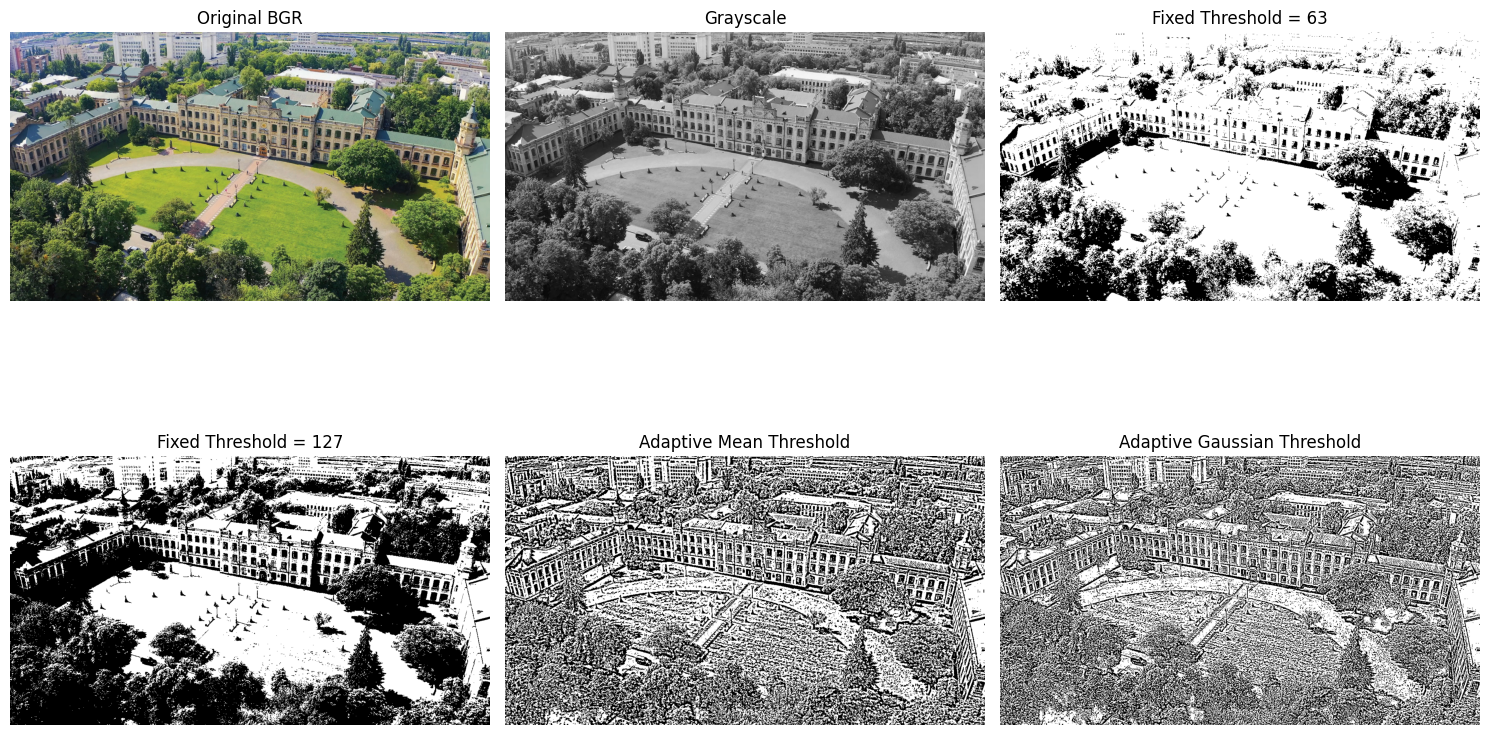

In [10]:
# *Дві порогові обробки
# 1) пороговий задаємо самостійно
# 2) адаптивний поріг - Тому

custom1 = 255//4
custom2 = 255//2

threshold_images = {
    "Original BGR":  col_img,
    "Grayscale": gray,
    f"Fixed Threshold = {custom1}": cv.threshold(gray, custom1, 255, cv.THRESH_BINARY)[1],
    f"Fixed Threshold = {custom2}": cv.threshold(gray, custom2, 255, cv.THRESH_BINARY)[1],
    "Adaptive Mean Threshold": cv.adaptiveThreshold(
        gray, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 11, 2
    ),
    "Adaptive Gaussian Threshold": cv.adaptiveThreshold(
        gray, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 11, 2
    )
}

show_images(list(threshold_images.values()), list(threshold_images.keys()), cols=3)
